In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Reading Data from the csv file

In [5]:
redwine_data = pd.read_csv (r'winequality-red.csv')
print(redwine_data.shape)

(1599, 12)


# .shape does the same work as print

In [6]:
redwine_data.shape

(1599, 12)

In [7]:
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [8]:
# checking for missing values
redwine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data  Analysis and Visualization 

In [9]:
redwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


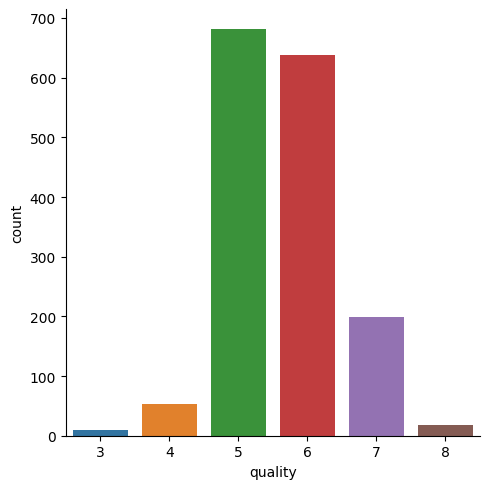

In [10]:
sns.catplot(x='quality'  , data=redwine_data ,kind='count')

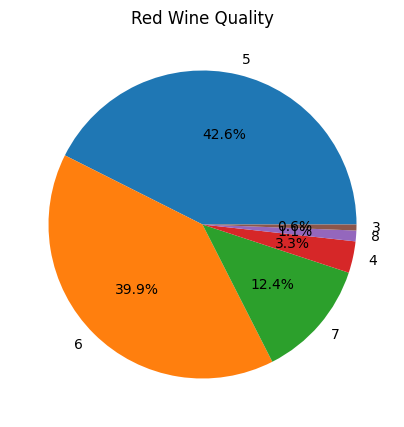

In [11]:
quality_counts = redwine_data['quality'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%',)
plt.title('Red Wine Quality')
plt.show()

# finding the correlation between Citric acid and Quality

Text(0.5, 1.0, 'The lower the citric acid the lower the quality of the wine')

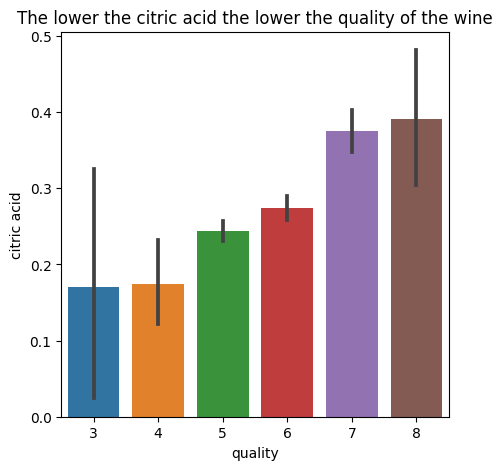

In [12]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality'  , y = 'citric acid' ,data = redwine_data)
plt.title('The lower the citric acid the lower the quality of the wine')

# finding the correlation between Volatile acidity and Quality

Text(0.5, 1.0, 'The higher the volatile acidity the lower the quality of the wine')

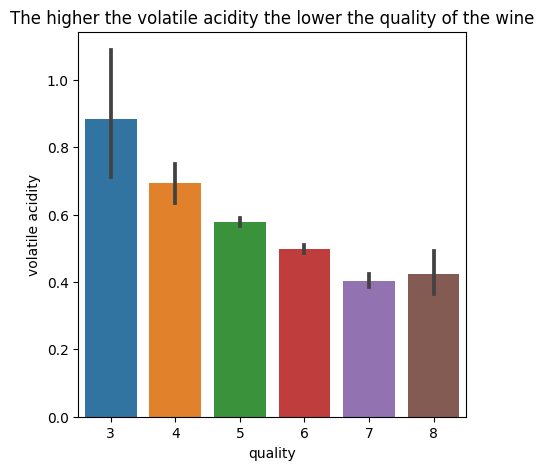

In [13]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality'  , y = 'volatile acidity' ,data = redwine_data)
plt.title('The higher the volatile acidity the lower the quality of the wine')

# Data Processing

<Axes: >

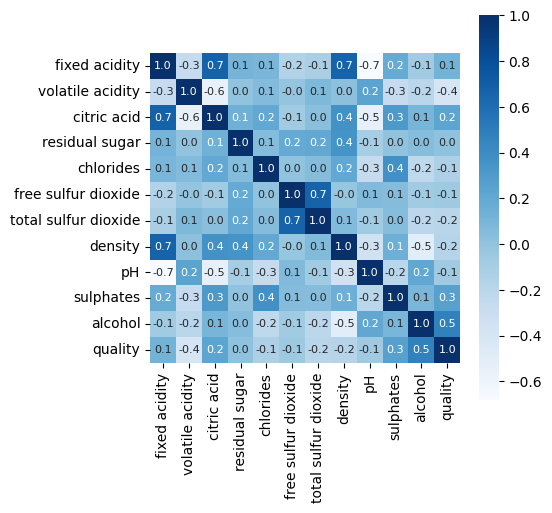

In [46]:
# finding the correlation between the various columns
correlation=redwine_data.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation , cbar=True , square=True ,fmt='.1f', annot=True , annot_kws={'size':8}, cmap='Blues')

In [14]:
X = redwine_data.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Label Binarization

In [15]:
Y = redwine_data['quality'].apply(lambda y_value :1 if y_value>=6 else 0)

In [16]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


# Train and Test Split 

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 20, test_size = 0.3)

In [30]:
print( Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1119,) (480,)


# Training the model

In [31]:
RandomF = RandomForestClassifier()
RandomF.fit(X_train, Y_train)

logistic_regression = LogisticRegression(max_iter = 2000)
logistic_regression.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

# Predictions

In [32]:
random_forest_pred = RandomF.predict(X_test)

logistic_regression_pred = logistic_regression.predict(X_test)

              precision    recall  f1-score   support

     Quality       0.72      0.76      0.74       217
 Not Quality       0.79      0.76      0.77       263

    accuracy                           0.76       480
   macro avg       0.75      0.76      0.75       480
weighted avg       0.76      0.76      0.76       480



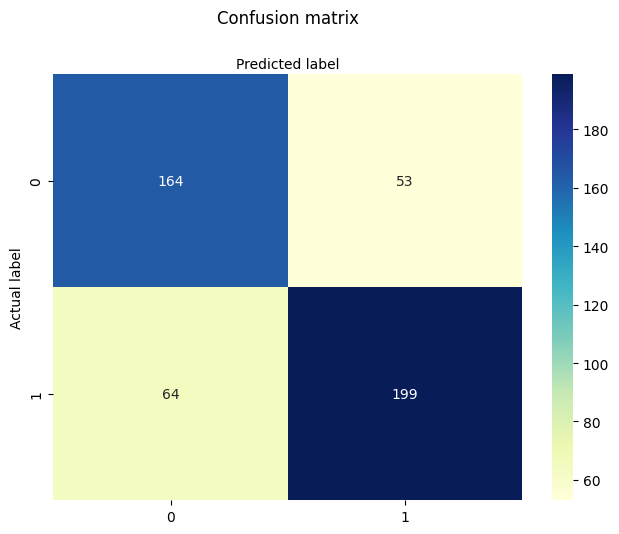

In [33]:
cnf_matrix3 = metrics.confusion_matrix(Y_test, logistic_regression_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Classification report
target_names = ['Quality', 'Not Quality']
print(classification_report(Y_test, logistic_regression_pred, target_names=target_names))

              precision    recall  f1-score   support

     Quality       0.76      0.82      0.79       138
 Not quality       0.85      0.80      0.83       182

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



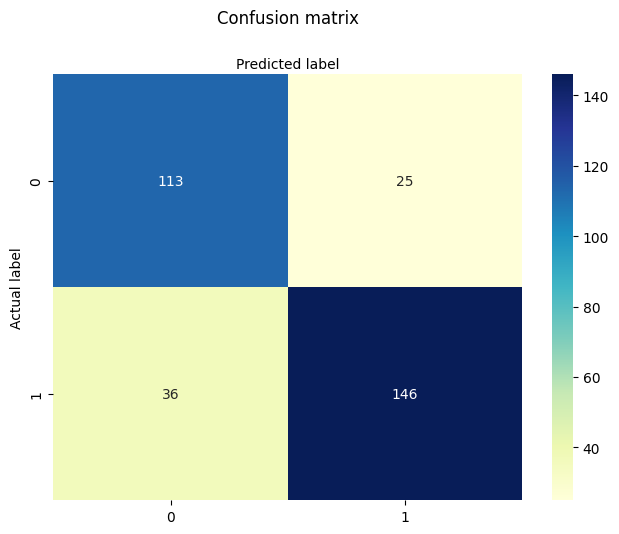

In [24]:
#KNN
cnf_matrix2 = metrics.confusion_matrix(Y_test, random_forest_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Classification report
target_names = ['Quality', 'Not quality']
print(classification_report(Y_test, random_forest_pred, target_names=target_names))